**This file contains the code for the classification of wine into two categories good or bad.**

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
red_df=pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [5]:
red_lst=[]
for i in range(1599):
  red_lst.append(red_df.loc[i][0].split(';'))


**This is our dataframe which needs to be converted to individual columns containg appropriate values**

In [ ]:
red_df.head(1)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


**Here I am taking out individual values for each column and storing it within a list.**

In [6]:
red_lst_fa=[float(red_lst[i][0]) for i in range(1599)]
red_lst_va=[float(red_lst[i][1]) for i in range(1599)]
red_lst_ca=[float(red_lst[i][2]) for i in range(1599)]
red_lst_rs=[float(red_lst[i][3]) for i in range(1599)]
red_lst_ch=[float(red_lst[i][4]) for i in range(1599)]
red_lst_fsd=[float(red_lst[i][5]) for i in range(1599)]
red_lst_tsd=[float(red_lst[i][6]) for i in range(1599)]
red_lst_de=[float(red_lst[i][7]) for i in range(1599)]
red_lst_ph=[float(red_lst[i][8]) for i in range(1599)]
red_lst_su=[float(red_lst[i][9]) for i in range(1599)]
red_lst_al=[float(red_lst[i][10]) for i in range(1599)]
red_lst_qu=[float(red_lst[i][11]) for i in range(1599)]

**Creating dataframe with individual columns and storing list values in it**

In [65]:
data={'fixed_acidity':red_lst_fa,'volatile_acidity':red_lst_va,'citric_acid':red_lst_ca,'residual_sugar':red_lst_rs,
      'chlorides':red_lst_ch,'free_sulfur_dioxide':red_lst_fsd,'total_sulfur_dioxide':red_lst_tsd,'density':red_lst_de,
      'pH':red_lst_ph,'sulfates':red_lst_su,'alcohol':red_lst_al,'quality':red_lst_qu}
df_red=pd.DataFrame(data=data)

In [66]:
df_red.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


**Here I am converting multiclass-classification problem into a binary-classification problem.**

In [67]:
for i,j in enumerate(df_red['quality'].values):
  if j>=7:
    df_red['quality'][i]='Good'
  else:
    df_red['quality'][i]='Bad'

**Now lets check if there are any null values present in the dataset**

In [56]:
(df_red.isnull().sum()/df_red.shape[0])*100

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulfates                0.0
alcohol                 0.0
quality                 0.0
dtype: float64

                                                         **EDA**

**Lets check the count of good quality wines over bad one**

1.   Here we can see that the dataset is pretty imbalanced and bad quality wines dominate over the good quality ones.



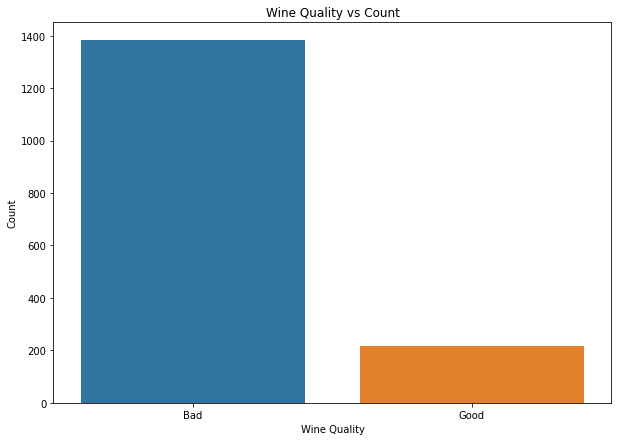

In [ ]:
fig,ax=plt.subplots(figsize=(10,7))
z=df_red['quality'].value_counts()
sns.barplot(data=df_red,x=df_red['quality'].unique(),y=z,ax=ax)
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Wine Quality vs Count')
plt.show()

**Correlation plot**

*   I always like exploring the correalation plot between the features as it tells us about the magnitude of linear/montonic relationship.

*   This is an important step as it can be used to check whether the features are independent or not.If the features are showing high correlation then we can drop one of these features as we do not want redundant features in our model as it will only increase the space and the time complexity.This problem is also known as multicollinearity.





In [ ]:
df_red_corr=df_red.drop('quality',axis=1).corr()
df_red_corr.style.background_gradient(cmap='hot_r').set_precision(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol
fixed_acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06
volatile_acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20
citric_acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11
residual_sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22
free_sulfur_dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07
total_sulfur_dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21
sulfates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09


**Pair plot**

1. **This plot helps us to visualize how two features affect the target variable.It can be used to create interaction features which can help our model to predict the target variable**



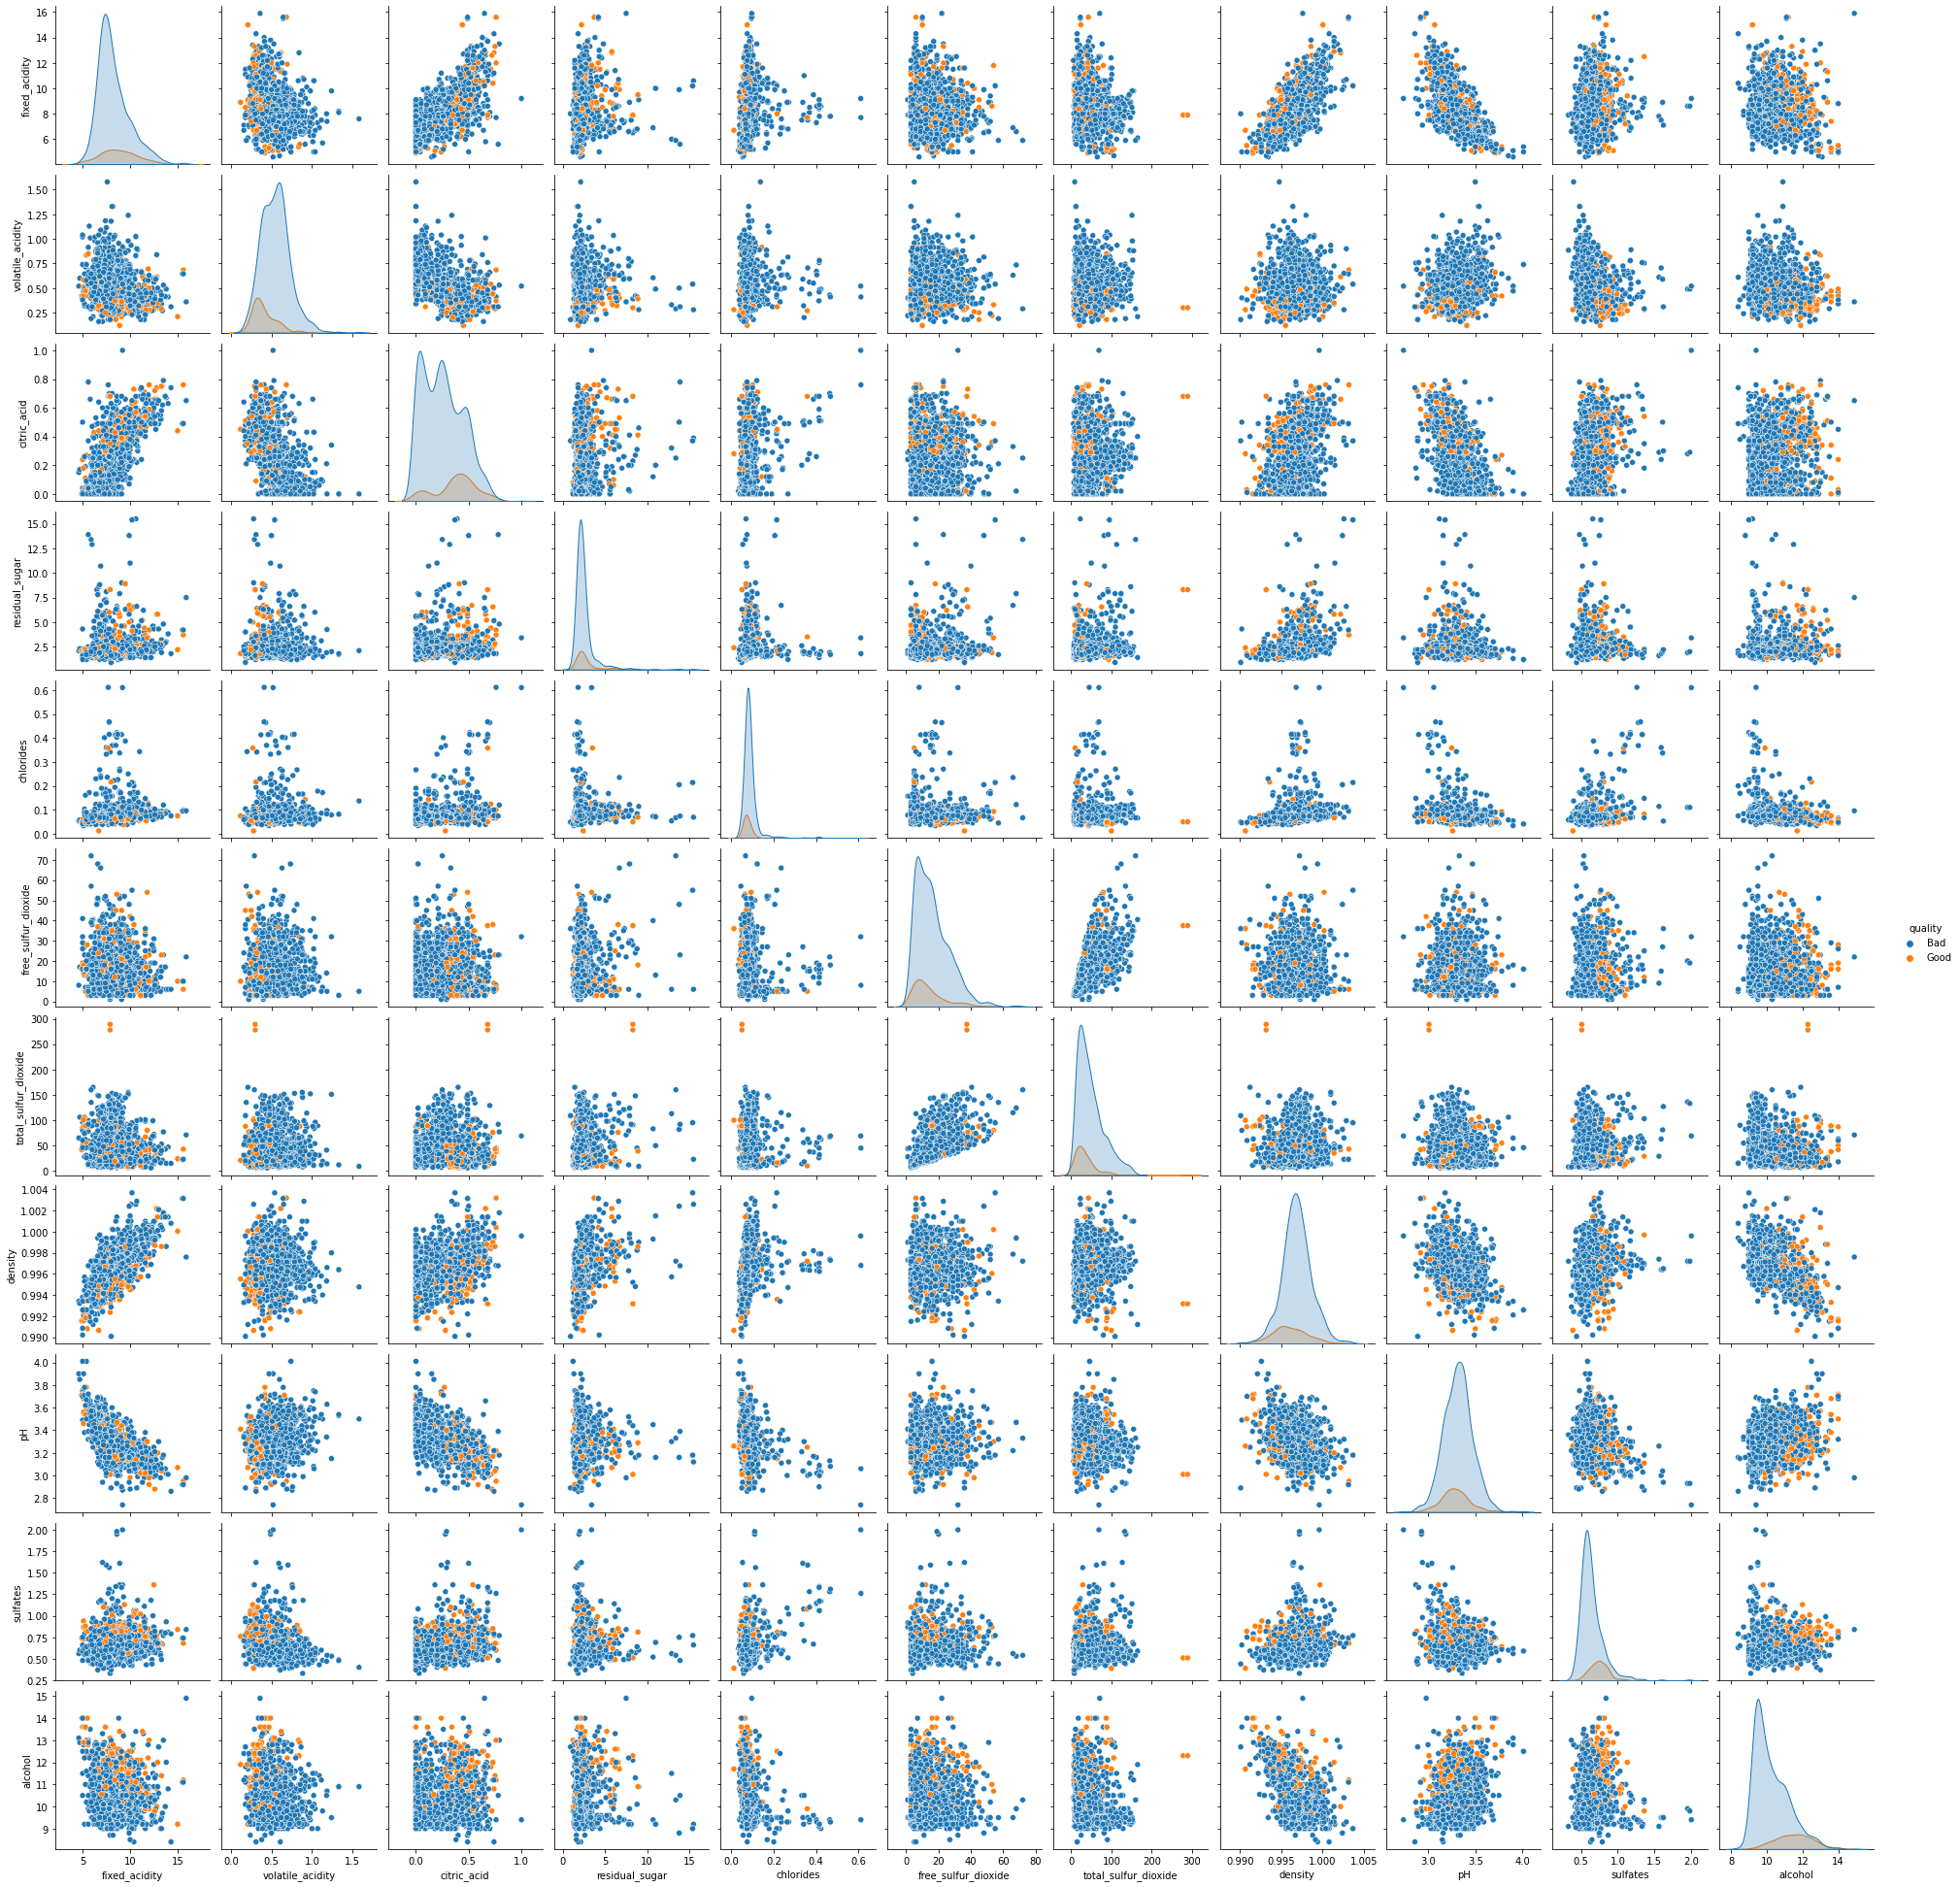

In [ ]:
sns.pairplot(data=df_red,hue='quality')
plt.show()

**Important Observations**

*   **We can see that pH and fixed acidity is having negative correlation with the target variable**

*   **Similarly density and fixed acidity is having positive correlation with the target variable**



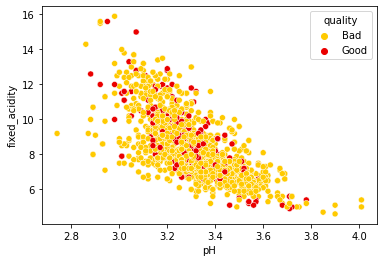

In [ ]:
sns.scatterplot(data=df_red,x='pH',y='fixed_acidity',hue='quality',palette='hot_r')
plt.show()

**Now from here on I will try to fit a linear and second order polynomial for both of these plots which in turn will help me to create interaction features based upon that**

In [ ]:
X=df_red['pH'].values
y=df_red['fixed_acidity'].values
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X.reshape(-1,1))
lin_reg=LinearRegression(fit_intercept=False)
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
lin=LinearRegression()
lin.fit(X.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

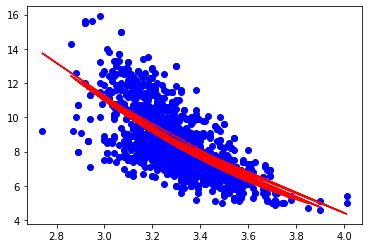

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(X_poly),color='red')

In [ ]:
print(lin_reg.coef_,lin_reg.intercept_)

[ 69.25857917 -29.05675112   3.21018626] 0.0


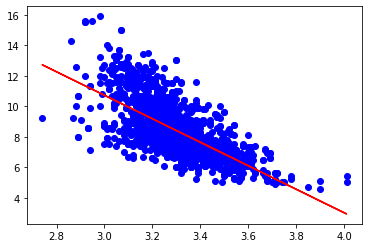

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin.predict(X.reshape(-1,1)),color='red')

In [ ]:
print(lin.coef_,lin.intercept_)

[-7.70229968] 33.82282339639754


In [ ]:
X_poly_d=poly.fit_transform(X_d.reshape(-1,1))
lin_reg.fit(X_poly_d,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

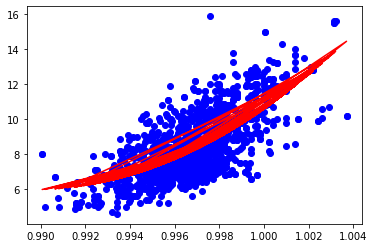

In [ ]:
plt.scatter(X_d,y,color='blue')
plt.plot(X_d,lin_reg.predict(X_poly_d),color='red')

In [ ]:
print(lin_reg.coef_,lin_reg.intercept_)

[ 41882.17537176 -84631.90293542  42760.33383997] 0.0


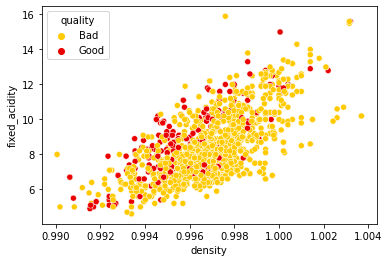

In [ ]:
sns.scatterplot(data=df_red,x='density',y='fixed_acidity',hue='quality',palette='hot_r')
plt.show()

In [ ]:
X_d=df_red['density'].values
lin_d=LinearRegression()
lin_d.fit(X_d.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

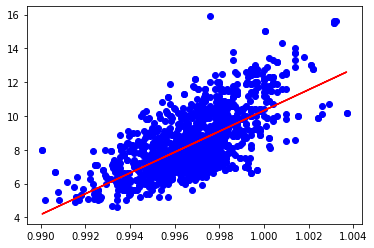

In [ ]:
plt.scatter(X_d,y,color='blue')
plt.plot(X_d,lin_d.predict(X_d.reshape(-1,1)),color='red')

In [ ]:
print(lin_d.coef_,lin_d.intercept_)

[616.28450984] -605.9599013339031


**Now from fitting the above two plots I will be able to create 4 interaction features out of it**

In [ ]:
############## BOX PLOT ################

**Box plot here helps to visualize how the ratings of wines are affected by individual features.It gives us a visual representation od the median and also tells us about the range in which 50% of the value lies.**

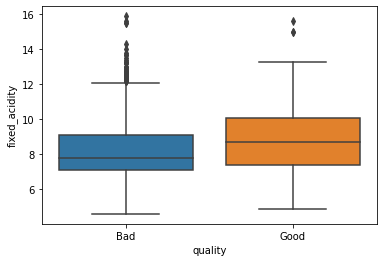

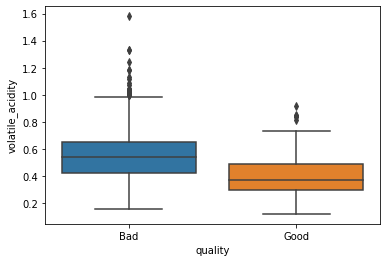

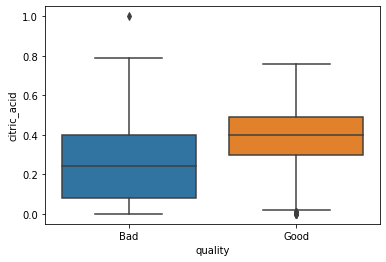

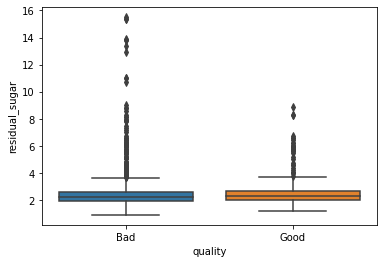

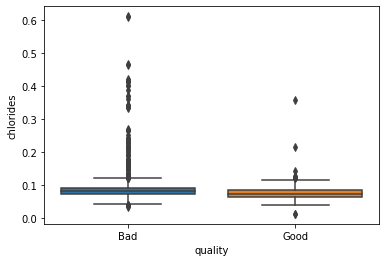

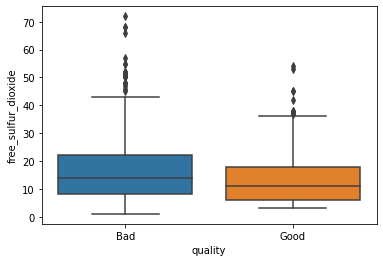

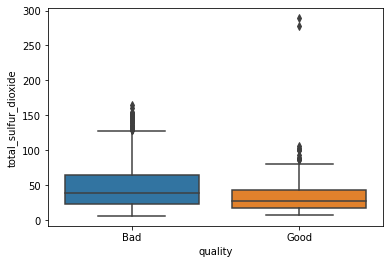

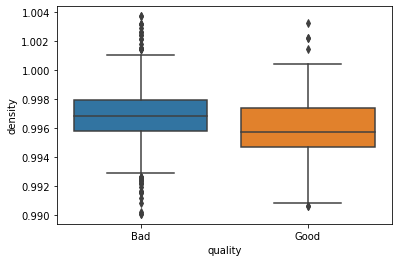

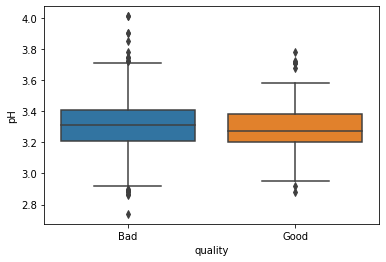

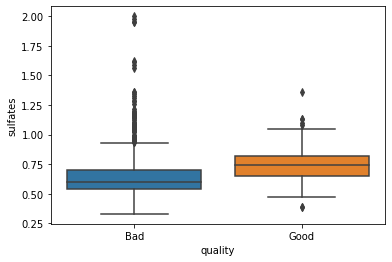

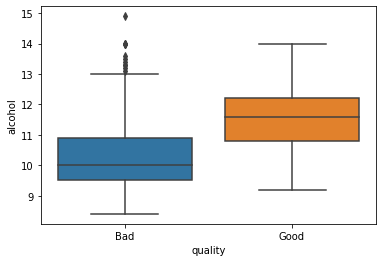

In [ ]:
for i in df_red.columns:
  if i!='quality':
    sns.boxplot(data=df_red,x='quality',y=i)
  plt.show()

**Important Observations**

*   **Here we can see that the medians are showing an significant difference which identifies whether the quality of the wine is good or bad.**

*   **Volatile acidity fixed acidity density  sulfates alcohol citric acid total sulfur dioxide pH and density are showing considerable difference in the quality of the wines.**







In [ ]:
############# PLOTTING INDIVIDUAL PLOTS(UNIVARIATE ANALYSIS)###################

**Univariate plots tells us about the distribution of the features.It is always helpful to impute the missing values if any according to the type of the distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


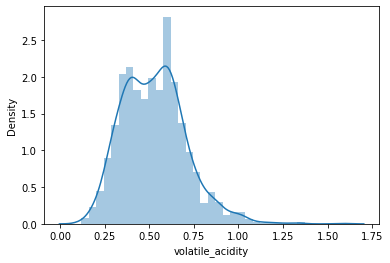

In [ ]:
sns.distplot((df_red['volatile_acidity']))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


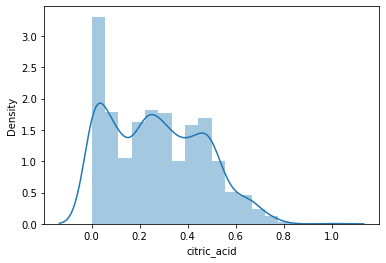

In [ ]:
sns.distplot((df_red['citric_acid']))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


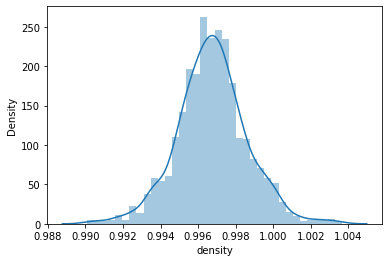

In [ ]:
sns.distplot(df_red['density'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


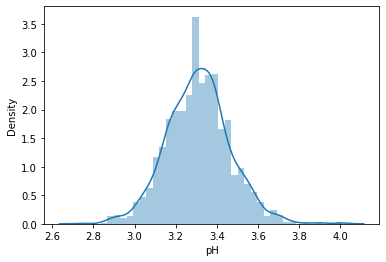

In [ ]:
sns.distplot(df_red['pH'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


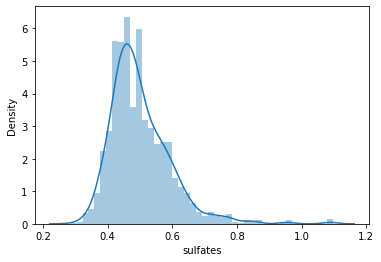

In [ ]:
sns.distplot(np.log1p(df_red['sulfates']))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


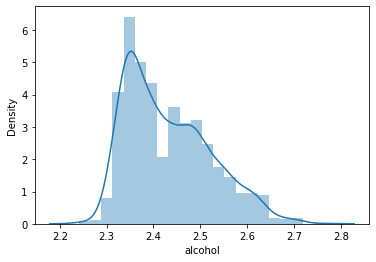

In [ ]:
sns.distplot((df_red['alcohol']))
plt.show()

In [ ]:
################### FEATURE ENGINEERING #########################

1.   **Finding the median of fixed acidity pH sulfates alcohol volatile acidity citric acid and density as these medians were showing a signifiacnt difference which can help determine the wine quality.**

2.   **After that we create features using the median**



In [68]:
label_encoder=LabelEncoder()

In [69]:
Y=label_encoder.fit_transform(df_red['quality'])
#df_red.drop('quality',axis=1,inplace=True)

In [70]:
train_x,train_y,y_train,y_test=train_test_split(df_red,Y,test_size=0.2,stratify=Y,random_state=42)

In [73]:
train_x['median_fa']=np.nan

for i in train_x['quality'].unique():
  z_fa=train_x[train_x['quality']==i]['fixed_acidity'].median()
  for j in train_x[train_x['quality']==i]['median_fa'].index:
    train_x['median_fa'][j]=z_fa

train_x['median_va']=np.nan

for i in train_x['quality'].unique():
  z_fa=train_x[train_x['quality']==i]['volatile_acidity'].median()
  for j in train_x[train_x['quality']==i]['median_va'].index:
    train_x['median_va'][j]=z_fa


train_x['median_ca']=np.nan

for i in train_x['quality'].unique():
  z_fa=train_x[train_x['quality']==i]['citric_acid'].median()
  for j in train_x[train_x['quality']==i]['median_ca'].index:
    train_x['median_ca'][j]=z_fa


train_x['median_tsd']=np.nan


for i in train_x['quality'].unique():
  z_fa=train_x[train_x['quality']==i]['total_sulfur_dioxide'].median()
  for j in train_x[train_x['quality']==i]['median_tsd'].index:
    train_x['median_tsd'][j]=z_fa


train_x['median_de']=np.nan

for i in train_x['quality'].unique():
  z_fa=train_x[train_x['quality']==i]['density'].median()
  for j in train_x[train_x['quality']==i]['median_de'].index:
    train_x['median_de'][j]=z_fa


train_x['median_ph']=np.nan


for i in train_x['quality'].unique():
  z_fa=train_x[train_x['quality']==i]['pH'].median()
  for j in train_x[train_x['quality']==i]['median_ph'].index:
    train_x['median_ph'][j]=z_fa


train_x['median_su']=np.nan


for i in train_x['quality'].unique():
  z_fa=train_x[train_x['quality']==i]['sulfates'].median()
  for j in train_x[train_x['quality']==i]['median_su'].index:
    train_x['median_su'][j]=z_fa


train_x['median_al']=np.nan


for i in train_x['quality'].unique():
  z_fa=train_x[train_x['quality']==i]['alcohol'].median()
  for j in train_x[train_x['quality']==i]['median_al'].index:
    train_x['median_al'][j]=z_fa

**Interaction features**

*   **As we saw that pH with fixed acidity was showing negative correaltion with the quality and density with fixed acidity was showing the vice-versa effect.Therefore by fitting linear and second order polynomial we can create 2 features for each combination.**



In [91]:
train_x['fixed_acidity_ph_int']=(train_x['pH']*(-7.702))+33.822
train_x['fixed_acidity_ph_sq_int']=((train_x['pH']**2)*(69.258) + train_x['pH']*(-29.0567) + 3.21)
train_x['fixed_acidity_de_int']=(train_x['density']*616.284)-605.9599
train_x['fixed_acidity_de_sq_int']=((train_x['density']**2)*(41882.175)+train_x['density']*(-84631.902)+42760.33)
train_x['log_sulfates']=np.log1p(train_x['sulfates'])
train_x.drop('quality',axis=1,inplace=True)

**Now as I have created the features we need to do feature selection.This helps the model to avoid overfitting on the training data**

In [96]:
pip install shap

     |████████████████████████████████| 358kB 6.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491620 sha256=9b145d0f10bd9418a022cf690adbd1b73c40c3bade68d5b73701212c573c6df7
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


**Using shap values feature selection as it is a reliable method as the shap values are the only values which shows the best contribution of that attribute with respect to the target variable**

In [98]:
import shap
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [100]:
clf=XGBClassifier(n_jobs=-1)
clf.fit(train_x,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [101]:
shap_values=shap.TreeExplainer(clf).shap_values(train_x)

**Plotting the summary plot gives us a very nice intuition of what features are affecting the target variable.**

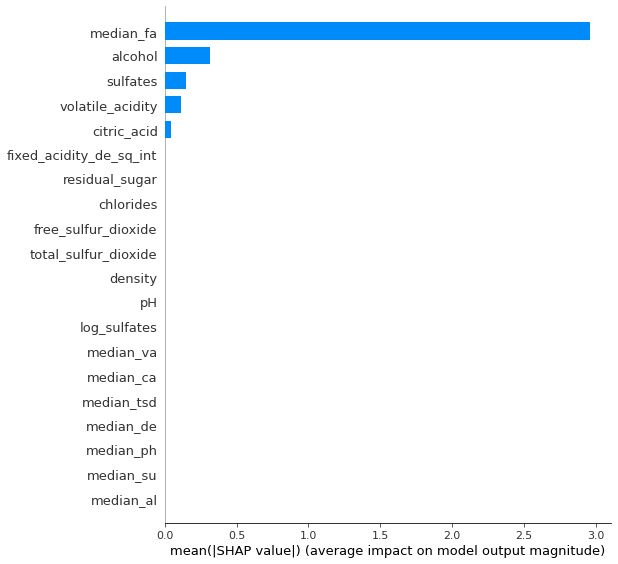

In [102]:
shap.summary_plot(shap_values,train_x,plot_type='bar')

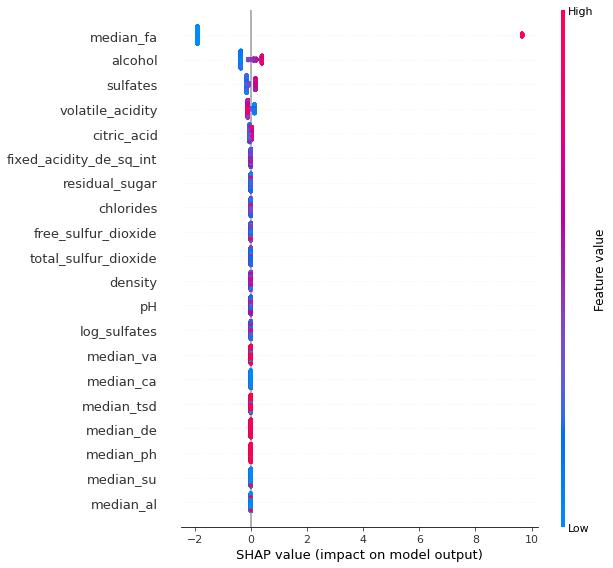

In [103]:
shap.summary_plot(shap_values,train_x,plot_type='dot')

**Dropping the features whivh are not useful for our model**

In [104]:
train_x.drop(['density','pH','chlorides','residual_sugar','free_sulfur_dioxide','log_sulfates','fixed_acidity_de_sq_int',
              'median_su','fixed_acidity_ph_int','fixed_acidity','fixed_acidity_ph_sq_int','fixed_acidity_de_int','total_sulfur_dioxide',
              'density','median_va','median_ca','median_tsd','median_ph','median_al','median_de'],axis=1,inplace=True)

**Hyperparametr Tuning**

*   Here we are tuning the params with the help of randomized search cv






In [105]:
params={'max_depth':[3,5,7,9],
        'n_estimators':[100,300,500,700],
        'learning_rate':[0.1,0.01,0.03,0.05],
        'subsample':[0.6,0.7,0.8,0.9,1.0],
        'colsample_bytree':[0.7,0.8,0.9,1.0]}
xgb_clf=XGBClassifier(n_jobs=-1)
search_cv=RandomizedSearchCV(xgb_clf,params,n_iter=10,cv=5,scoring='accuracy',verbose=50,n_jobs=-1,random_state=42)
search_cv.fit(train_x,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

**Finding the best score and params**

In [106]:
search_cv.best_score_

1.0

In [107]:
confusion_matrix(y_train,xgb_clf_final.predict(train_x))

array([[1105,    0],
       [   0,  174]])

In [108]:
search_cv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.03,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 0.7}

**Fitting the model with the best params obtained from the above randomized search**

In [110]:
xgb_clf_final=XGBClassifier(max_depth=5,learning_rate=0.05,n_estimators=700,subsample=0.9,colsample_bytree=1,n_jobs=-1)
xgb_clf_final.fit(train_x,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [44]:
################## PREDICTING ON THE TEST SET USING THE BEST MODEL ########################

In [113]:
train_y['median_fa']=np.nan

for i in train_y['quality'].unique():
  z_fa=train_y[train_y['quality']==i]['fixed_acidity'].median()
  for j in train_y[train_y['quality']==i]['median_fa'].index:
    train_y['median_fa'][j]=z_fa

train_y['median_va']=np.nan

for i in train_y['quality'].unique():
  z_fa=train_y[train_y['quality']==i]['volatile_acidity'].median()
  for j in train_y[train_y['quality']==i]['median_va'].index:
    train_y['median_va'][j]=z_fa


train_y['median_ca']=np.nan

for i in train_y['quality'].unique():
  z_fa=train_y[train_y['quality']==i]['citric_acid'].median()
  for j in train_y[train_y['quality']==i]['median_ca'].index:
    train_y['median_ca'][j]=z_fa


train_y['median_tsd']=np.nan


for i in train_y['quality'].unique():
  z_fa=train_y[train_y['quality']==i]['total_sulfur_dioxide'].median()
  for j in train_y[train_y['quality']==i]['median_tsd'].index:
    train_y['median_tsd'][j]=z_fa


train_y['median_de']=np.nan

for i in train_y['quality'].unique():
  z_fa=train_y[train_y['quality']==i]['density'].median()
  for j in train_y[train_y['quality']==i]['median_de'].index:
    train_y['median_de'][j]=z_fa


train_y['median_ph']=np.nan


for i in train_y['quality'].unique():
  z_fa=train_y[train_y['quality']==i]['pH'].median()
  for j in train_y[train_y['quality']==i]['median_ph'].index:
    train_y['median_ph'][j]=z_fa


train_y['median_su']=np.nan


for i in train_y['quality'].unique():
  z_fa=train_y[train_y['quality']==i]['sulfates'].median()
  for j in train_y[train_y['quality']==i]['median_su'].index:
    train_y['median_su'][j]=z_fa


train_y['median_al']=np.nan


for i in train_y['quality'].unique():
  z_fa=train_y[train_y['quality']==i]['alcohol'].median()
  for j in train_y[train_y['quality']==i]['median_al'].index:
    train_y['median_al'][j]=z_fa

In [115]:
train_y['fixed_acidity_ph_int']=(train_y['pH']*(-7.702))+33.822
train_y['fixed_acidity_ph_sq_int']=((train_y['pH']**2)*(69.258) + train_y['pH']*(-29.0567) + 3.21)
train_y['fixed_acidity_de_int']=(train_y['density']*616.284)-605.9599
train_y['fixed_acidity_de_sq_int']=((train_y['density']**2)*(41882.175)+train_y['density']*(-84631.902)+42760.33)
train_y['log_sulfates']=np.log1p(train_y['sulfates'])
train_y.drop('quality',axis=1,inplace=True)

In [117]:
train_y.drop(['density','pH','chlorides','residual_sugar','free_sulfur_dioxide','log_sulfates','fixed_acidity_de_sq_int',
              'median_su','fixed_acidity_ph_int','fixed_acidity','fixed_acidity_ph_sq_int','fixed_acidity_de_int','total_sulfur_dioxide',
              'density','median_va','median_ca','median_tsd','median_ph','median_al','median_de'],axis=1,inplace=True)

In [119]:
test_pred_xgb=xgb_clf_final.predict_proba(train_y)

In [120]:
test_pred_xgb_label=xgb_clf_final.predict(train_y)

In [121]:
accuracy_score(y_test,test_pred_xgb_label,)##Log-Loss with the best model

1.0

In [122]:
confusion_matrix(y_test,test_pred_xgb_label)

array([[277,   0],
       [  0,  43]])

**Now I will predict the quality of each wine in the test set using my xgb classifier.Here I am giving it a single row to predict whether that belongs to good/bad quality of wine.**

In [123]:
test_pred_xgb_class=xgb_clf_final.predict(train_y[train_y.index==763])

**Now as the bad quality of wine was encoded as 0 and good quality of wine was encoded as 1 we can know given any test set what quality of wine it belongs to.**

In [124]:
if test_pred_xgb_class[0]==0:
  print('Bad Quality of Wine')
elif test_pred_xgb_class[0]==1:
  print('Good Quality of Wine')

Bad Quality of Wine
